# Introduction
This notebook conducts an in-depth analysis of the World Happiness Report for the years 2018 and 2019. The World Happiness Report is a landmark survey that asks individuals from various countries to rate their level of happiness on a scale from 0 to 10. The purpose of this notebook is to delve into the data provided by this report and attempt to answer pertinent questions regarding the factors that influence happiness. These factors include GDP per capita, social support, generosity, and perceptions of corruption, among others.

The notebook employs various visualization techniques to effectively represent the distribution and correlation of the data, thereby facilitating a more comprehensive understanding of the information at hand. The ultimate goal is to uncover patterns and trends that may shed light on the complex dynamics of happiness across different nations. By doing so, we hope to contribute to the ongoing discourse on happiness and well-being, providing valuable insights that could inform policy-making and other initiatives aimed at enhancing quality of life globally.

In essence, this Jupyter notebook serves as a tool for exploring and interpreting the World Happiness Report, offering a detailed examination of how various factors interact to shape people’s subjective experiences of happiness. It represents an important step towards a more nuanced understanding of happiness, paving the way for further research in this fascinating field.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
happy_df = pd.read_csv('report_2018-2019.csv')

## Data Preparation and Cleaning
Data is clean and there is missing data in either 2018 or 2019 for only a small number of countries but it doesn't affect the analysis much.

In [8]:
happy_df

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


In [9]:
happy_df.shape

(312, 10)

In [11]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Year                          312 non-null    int64  
 3   Score                         312 non-null    float64
 4   GDP per capita                312 non-null    float64
 5   Social support                312 non-null    float64
 6   Healthy life expectancy       312 non-null    float64
 7   Freedom to make life choices  312 non-null    float64
 8   Generosity                    312 non-null    float64
 9   Perceptions of corruption     312 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB


In [12]:
happy_df.describe()

,Overall rank,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,78.500000,2018.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.182926,0.111526
std,45.104737,0.500803,1.114631,0.394592,0.300310,0.252724,0.156024,0.096739,0.095296
min,1.000000,2018.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,2018.000000,4.514250,0.609500,1.055750,0.488250,0.322500,0.108750,0.050000
50%,78.500000,2018.500000,5.379500,0.960000,1.265500,0.699000,0.449500,0.175500,0.082000
75%,117.250000,2019.000000,6.176000,1.219500,1.457500,0.858000,0.540250,0.245000,0.141250
max,156.000000,2019.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.598000,0.457000


## Exploratory Analysis and Visualization



In [15]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [17]:
import numpy as np

#### Happiness score of each country
Since the report provided scores in 2018 and 2019, it is averaged to show a high-level overview of happiness in each country

In [18]:
score_df = happy_df.groupby('Country or region')[['Score']].mean()
score_df['country'] = pd.unique(happy_df['Country or region'])
score_df.set_index(np.arange(score_df.shape[0]))

,Score,country
0,3.4175,Afghanistan
1,4.6525,Albania
2,5.2530,Algeria
3,3.7950,Angola
4,6.2370,Argentina
...,...,...
155,4.7565,Venezuela
156,5.1390,Vietnam
157,3.3675,Yemen
158,4.2420,Zambia


A bar chart is created to show the values

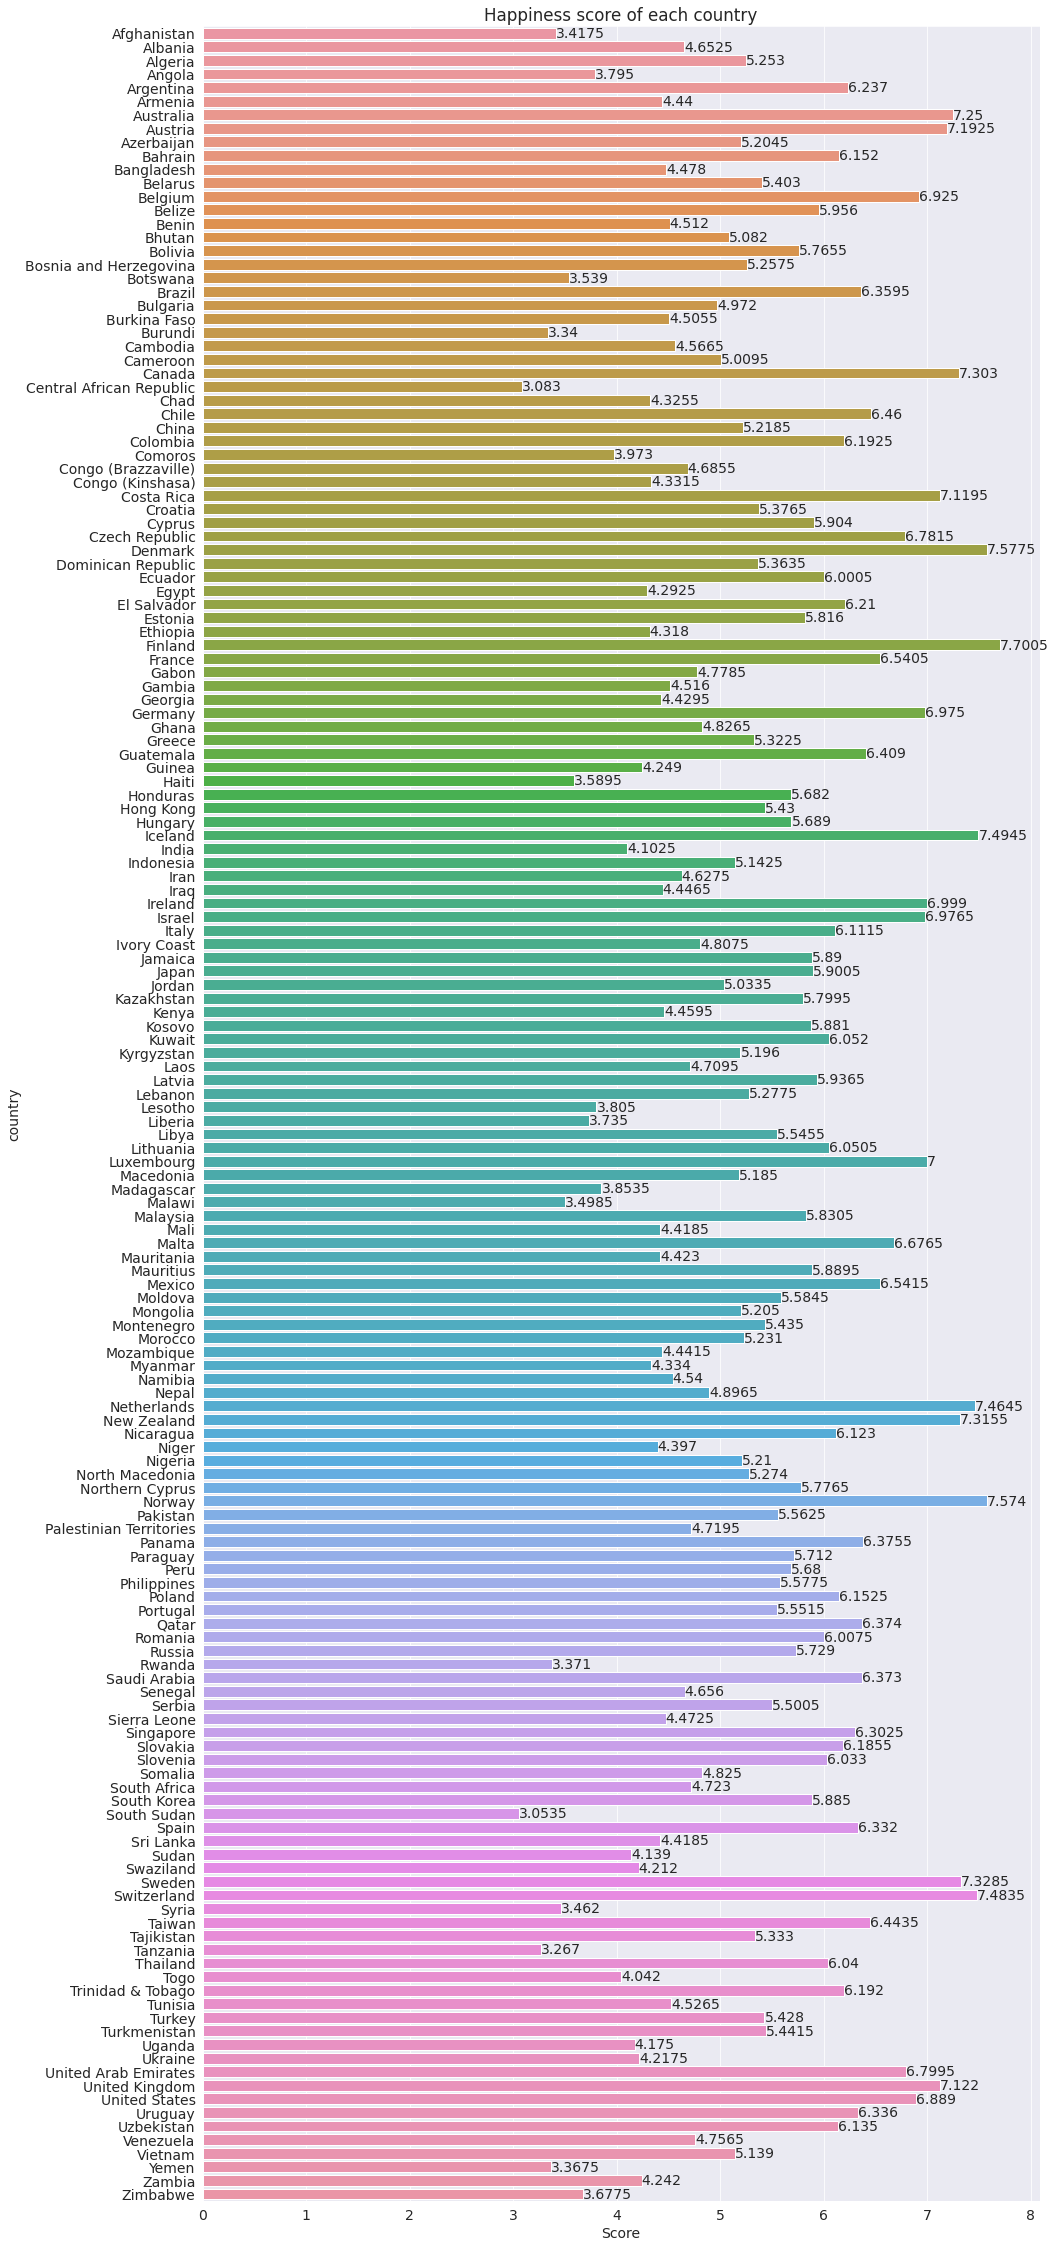

In [23]:
matplotlib.rcParams['figure.figsize'] = (15, 40)
plt.title('Happiness score of each country')
ax = sns.barplot(x = 'Score', y = 'country', data = score_df);
for i in ax.containers:
    ax.bar_label(i,)

From the bar plot above, we can only see an overview of happiness score of each country without much insight, so we need to explore more.

#### Distribution of happiness index
Apart from the actual value of the score of each country, the distribution displays more valuable information about the overall happiness of the world.

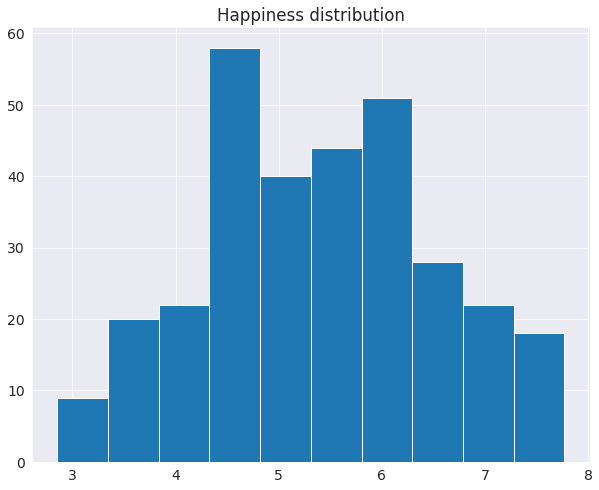

In [183]:
plt.title('Happiness distribution')
plt.hist(happy_df.Score);

The histogram shows that there are way more countries indicated their happiness index at the middle than on the sides, which is reasonable and intuitive since only very few cases would feel extremely happy or unhappy.

#### Correlation between the factors and happiness score

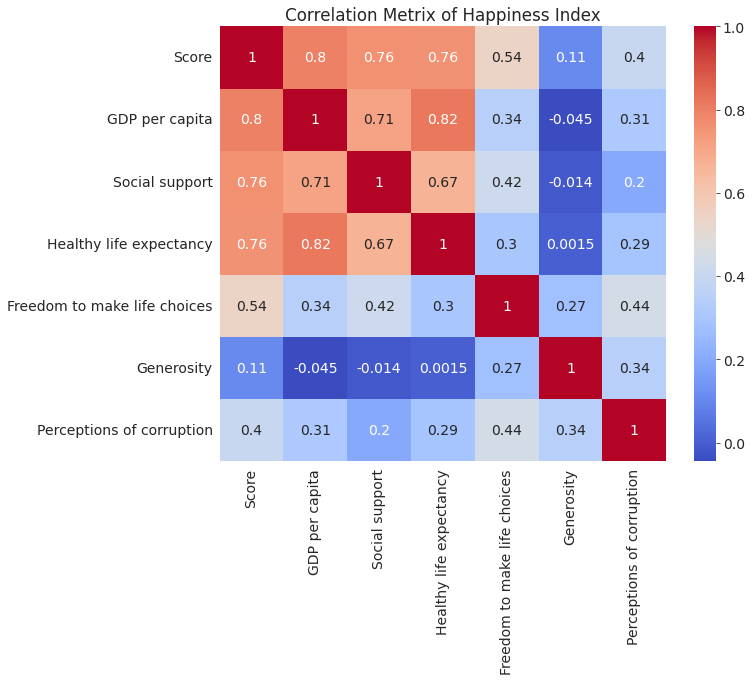

In [168]:
matplotlib.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(happy_df.drop(['Overall rank','Country or region','Year'],axis = 1).corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Metrix of Happiness Index');

It is noticeable that "GDP per capita" is the most related to happiness, while "Perceptions of corruption" contributes the least

Besides the correlation values, we can also find the relationship between two factors by looking at the line plot.

One of the factors should be sorted and the data extracted from the dataframe should be transformed into an array

Take "Social support" vs. "Generosity" as an example. In the correlation matrix it showes -0.014, meaning there's almost no relation between the two. Let's look at the line plot to verify.

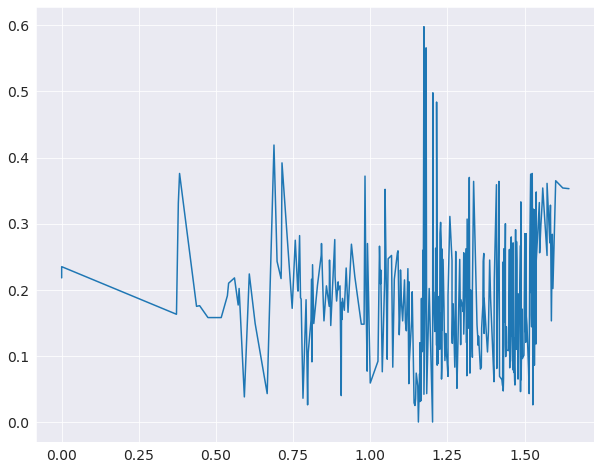

In [180]:
support = np.array(happy_df.sort_values('Social support')['Social support'])
generosity = np.array(happy_df.sort_values('Social support')['Generosity'])
generosity
plt.plot(support,generosity);

Apparently from the line plot, there is no relationship between them.


Let us save and upload our work to Jovian before continuing

## Asking and Answering Questions


#### Q1: Is the world in general happy?

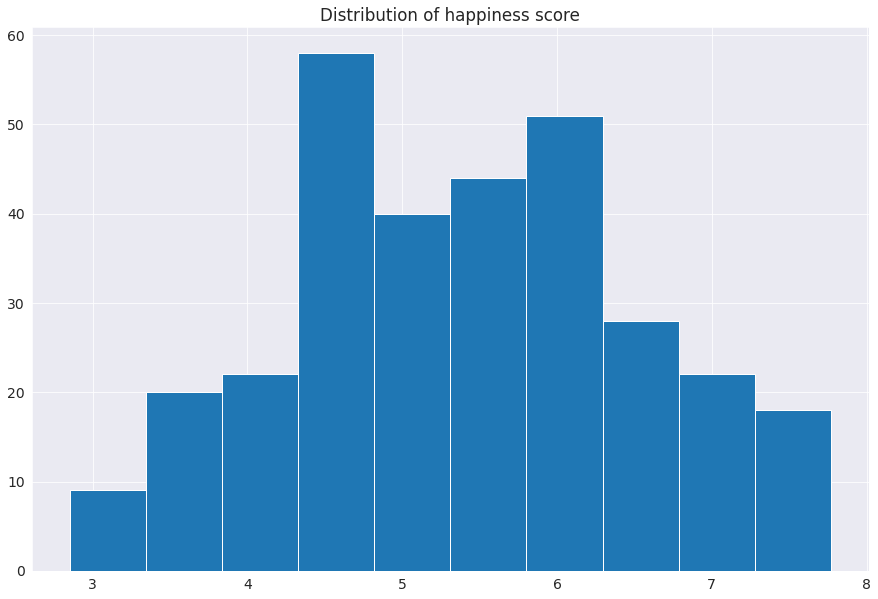

In [25]:
matplotlib.rcParams['figure.figsize'] = (15, 10)
plt.title('Distribution of happiness score')
plt.hist(happy_df.Score);

By looking at the histogram, we can tell that a great number of countries land between 4.5 and 6.5 in terms of the happy index.

In [218]:
print(happy_df.Score.mean(),happy_df.Score.median())

5.39150641025641 5.3795


Along with the average and median of the score, we can conclude that the world is in general feeling just ok.

#### Q2: Is the world in 2019 happier than 2018?

We'll compare the average score from both years and sample some countries to have a more detailed comparison

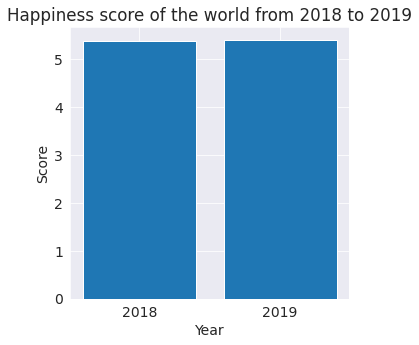

In [78]:
matplotlib.rcParams['figure.figsize'] = (5, 5)
plt.title('Happiness score of the world from 2018 to 2019')
happy_by_year_df = happy_df.groupby('Year')[['Score']].mean()
plt.xlabel('Year')
plt.ylabel('Score')
plt.bar(['2018','2019'],happy_by_year_df.Score);


Though it's not obvious, we can see that there is a very slight increase in the happiness score of the world. 

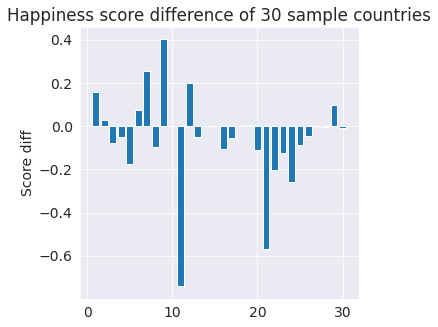

In [69]:
happy_diff_30 = happy_df.groupby('Country or region')[['Score']].diff().dropna().sample(30)
plt.title('Happiness score difference of 30 sample countries')
plt.ylabel('Score diff')
plt.bar(np.arange(1,31,1), happy_diff_30.Score);

Even though the world is overall slightly happier, it appears from the sampled plot that it's not the case for many countries.

#### Q3: An interesting metric, "perceptions of corruption", is also included in the dataset. If we consider the middle of the scale(0.25) to be the threshold of the country being corrupted, how many corrupted countries are there?

In [131]:
corruption_df = happy_df.groupby('Country or region')[['Score','Perceptions of corruption']].mean()

In [155]:
corrupted = corruption_df[corruption_df['Perceptions of corruption']>0.25]
print(corrupted.count(),corrupted.count()/happy_df.shape[0])

Score                        16
Perceptions of corruption    16
dtype: int64 Score                        0.051282
Perceptions of corruption    0.051282
dtype: float64


There are 16 countries considered corrupted, which is around 5.13% of the world.

#### Q3.1 However, are they happy?

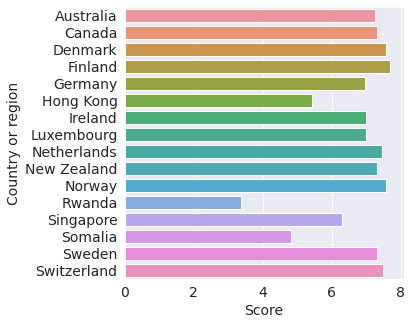

In [152]:
sns.barplot(x = 'Score',y = corrupted.index,data = corrupted);

Most of the countries but two have a score higher than 5, we can state the corruption of a country also is related to happiness.

#### Q4: Is there a relationship between GDP per capita and the happiness score? On other words, does richness contribute to happiness?

In [72]:
happy_vs_GDP = happy_df.groupby('Country or region')[['Score','GDP per capita']].mean()

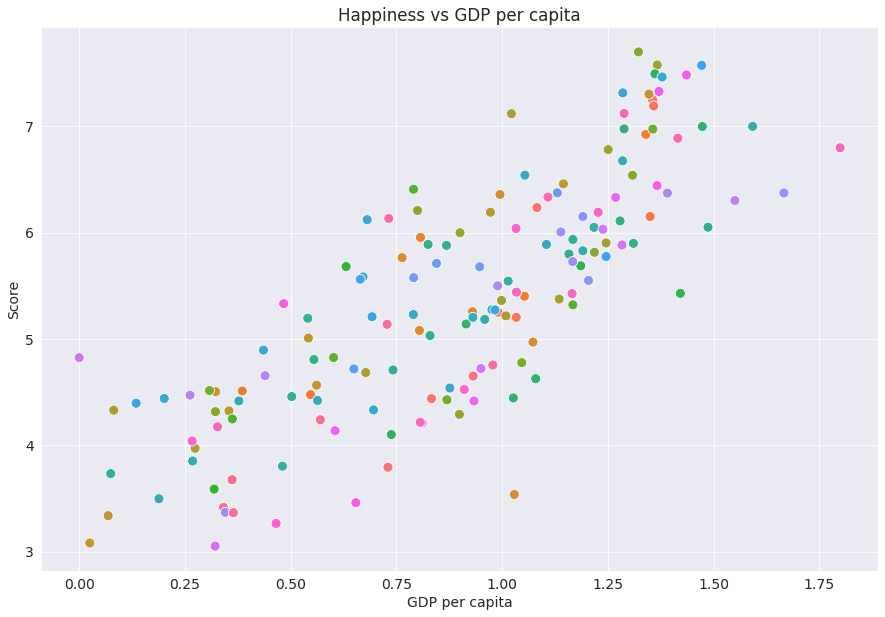

In [75]:
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.title('Happiness vs GDP per capita')
sns.scatterplot(x = 'GDP per capita',
                y = 'Score',
                hue = 'Country or region',
                legend = False,
                s = 100,
                data = happy_vs_GDP);

From the scatter plot we can see that there is a positive relationship between happiness and GDP per capita.

#### Q5: We all heard this before, "Sharing is caring and it makes you happy." So is being generous actually a happy thing?

In [76]:
happy_vs_generous = happy_df.groupby('Country or region')[['Score','Generosity']].mean()
happy_vs_generous

,Score,Generosity
Country or region,,
Afghanistan,3.4175,0.1745
Albania,4.6525,0.1635
Algeria,5.2530,0.0640
Angola,3.7950,0.0790
Argentina,6.2370,0.0640
...,...,...
Venezuela,4.7565,0.0600
Vietnam,5.1390,0.1620
Yemen,3.3675,0.0955


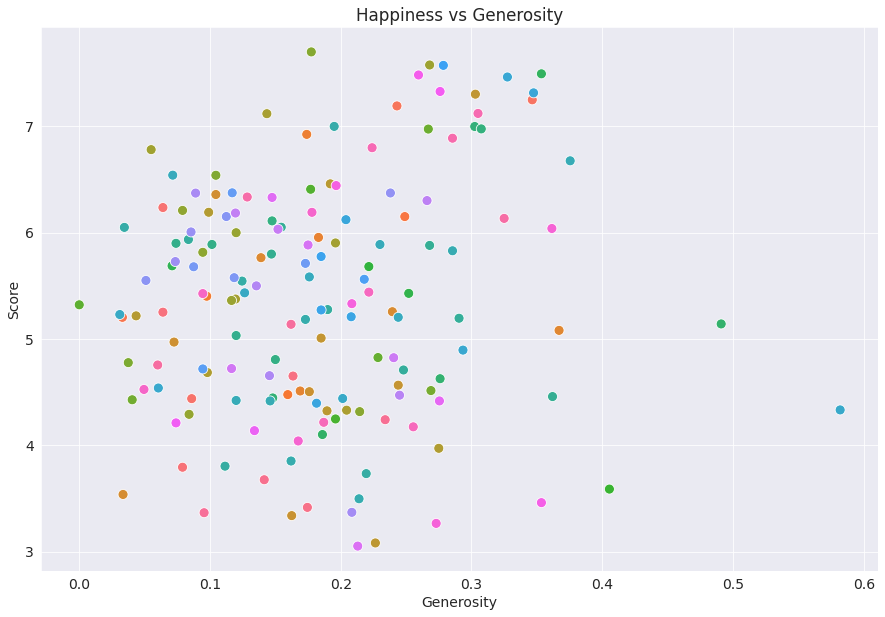

In [77]:
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.title('Happiness vs Generosity')
sns.scatterplot(x = 'Generosity',
                y = 'Score',
                hue = 'Country or region',
                legend = False,
                s = 100,
                data = happy_vs_generous);

Seems like there is also a positive relationship between the two, but the relationship isn't as obvious as that with GDP per capita since the dots are more evenly distributed on the plot.

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

The analysis shows that the world is in general feeling just ok, with an average happiness score of around 5.4. There is a slight increase in the happiness score from 2018 to 2019, but not for all countries. The analysis also reveals that happiness has a positive relationship with every factor, but especially with GDP per capita, which is the most correlated factor. However, there are also some countries that have high levels of corruption but still have high happiness scores, which suggests that other factors may also play a role. The analysis could be improved by using more recent data and applying regression techniques to find a more comprehensive relationship between

## Reference and Future Work

The data used in this analysis comes from the World Happiness Report 2018-2019, which is published by the United Nations Sustainable Development Solutions Network. The report is based on a survey conducted by Gallup, which asks people to evaluate their current life satisfaction and their expected future life satisfaction. The report also provides data on six factors that contribute to happiness: GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption.

A possible direction for future work is to compare the happiness scores and factors of different regions or groups of countries, such as continents, cultures, or income levels. Another direction is to explore the impact of other factors that are not included in the report, such as environmental quality, political stability, or human rights. Furthermore, it would be interesting to see how the happiness scores and factors change over time, especially after the COVID-19 pandemic.